# 1. Introduction

## 1.1 Project Overview

In this data science project, we aim to explore and analyze the LastFM Asia Social Network dataset. The dataset represents a social network of LastFM users from various Asian countries, where nodes denote users, and edges represent mutual follower relationships between them. By leveraging network analysis techniques and machine learning algorithms, we seek to uncover interesting insights into the musical preferences of users and the social connections among them.

## 1.2 Background Information

The LastFM Asia Social Network dataset was collected from the public API in March 2020. It contains valuable information about LastFM users' liking behavior for various artists. Understanding the social network structure and identifying patterns based on musical interests can offer valuable knowledge for recommendation systems, community detection, and understanding user behavior in the context of music-driven social networks. LastFM Asia Social Network. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5X03D.

## 1.3 Objective of the Analysis

The primary objective of this data science project is to build a robust multinomial node classification model that accurately predicts the location (country) of LastFM users based on the artists they have liked. By achieving this, we aim to uncover meaningful patterns and hidden relationships within the social network, shedding light on the diverse music landscapes across Asian countries. Additionally, the project will explore the network's structure through link prediction and community detection, further enriching our understanding of the musical connections among users.

Key Deliverables:

- A well-structured and cleaned LastFM Asia Social Network dataset for analysis.
- Exploratory data analysis (EDA) to gain insights into the network's characteristics and user preferences.
- Implementation of multinomial node classification models to predict user locations.
- Network visualization and community detection to visualize user clusters and identify influential nodes.
- Interpretation of model results and insights into the cultural and social aspects of music-driven social networks in Asia.
- A comprehensive project report outlining findings, methodologies, and recommendations for the LastFM platform or related industries.

## 1.4 Dataset Information

The dataset represents a social network of LastFM users from Asian countries. It was collected from the public API in March 2020 and is specifically tailored for graph analysis and node classification tasks. The dataset comprises three main components:

- "lastfm_asia_edges.csv": Contains the edges (mutual follower relationships) between LastFM users. Columns: "node_1" and "node_2."

- "lastfm_asia_target.csv": Contains the target feature, which is the location (country) of each LastFM user. Columns: "id" and "target."

- "lastfm_asia_features.json": Contains vertex features, which are the artists liked by each user. It is provided in the form of a JSON file, mapping node IDs (user IDs) to a list of liked artists.

Statistics:

- Nodes 7,624
- Edges 27,806
- Density 0.0009
- Transitivity 0.1787

During the project, we will use the information from both the "lastfm_asia_edges.csv" file to build the social network graph and the "lastfm_asia_target.csv" file for multinomial node classification to predict the user locations based on their liked artists. The "lastfm_asia_features.json" file will be used to extract the artists liked by each user for feature engineering and analysis.

The main question that we will try to answer in this project is:

**"Can we accurately predict the location (country) of LastFM users based on their liked artists, and what insights can we derive from the social network structure and music preferences of users in the LastFM Asia Social Network?"**

By answering this question, we can understand how musical preferences might be indicative of a user's location and how social connections in the LastFM network are influenced by music interests.

# 2. Table Of Contents

# 3. Data Exploration and Preprocessing

## 3.1 Loading the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imports
import pandas as pd
import numpy as np
import json
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load the CSV files
edges_data = pd.read_csv('lastfm_asia_edges.csv')
target_data = pd.read_csv('lastfm_asia_target.csv')

# Load the JSON file
with open('lastfm_asia_features.json') as json_file:
    features_data = json.load(json_file)

## 3.2 Dataset Overview and Structure

Now, let's take an overview of the loaded datasets and understand their structure.

In [ ]:
# Display first few rows of edges data
print("Edges Data (lastfm_asia_edges.csv):")
print(edges_data.head())

Edges Data (lastfm_asia_edges.csv):
   node_1  node_2
0       0     747
1       1    4257
2       1    2194
3       1     580
4       1    6478


- node_1: Represents the node ID (user ID) of one user in the mutual follower relationship.
- node_2: Represents the node ID (user ID) of the other user in the mutual follower relationship.

In [ ]:
# Display first few rows of target data
print("\nTarget Data (lastfm_asia_target.csv):")
print(target_data.head())


Target Data (lastfm_asia_target.csv):
   id  target
0   0       8
1   1      17
2   2       3
3   3      17
4   4       5


- id: Represents the node ID (user ID) of a LastFM user.
- target: Represents the location (country) of the corresponding user.

In [ ]:
# Display first few items from vertex features data
print("\nVertex Features Data (lastfm_asia_features.json):")
for node_id, liked_artists in list(features_data.items())[:5]:
    print(f"Node ID: {node_id}, Liked Artists: {liked_artists}")


Vertex Features Data (lastfm_asia_features.json):
Node ID: 0, Liked Artists: [2964, 3900, 3902, 2402, 6185, 509, 7627, 3389, 2407, 5, 4403, 3633, 5875, 3395, 3531, 6908, 3202, 5883, 21, 7389, 1449, 5391, 3400, 2911, 6618, 3315, 1454, 4904, 3409, 3920, 6401, 3923, 4909, 2919, 532, 1463, 540, 4427, 5907, 7412, 1926, 7416, 3935, 5913, 4349, 6420, 1472, 6948, 3979, 58, 5918, 5920, 5417, 6950, 4439, 1020, 4442, 5925, 1945, 3947, 3442, 5941, 1027, 4805, 5528, 3455, 2457, 4159, 7235, 5720, 1359, 7444, 2463, 1044, 4461, 3042, 3471, 1504, 6977, 7450, 1507, 4464, 6388, 584, 6454, 585, 3479, 6455, 6986, 4893, 3154, 3482, 3483, 2477, 6041, 6731, 1138, 2977, 6468, 3993, 2006, 7366, 7005, 602, 3998, 2991, 5460, 7009, 7010, 3500, 2499, 6736, 6367, 5464, 7014, 4990, 7016, 2999, 1530, 4500, 1075, 338, 5468, 1533, 1078, 2541, 7024, 6635, 3523, 4019, 2024, 4081, 498, 5011, 3069, 3530, 4025, 1549, 133, 7037, 3533, 1552, 5489, 2533, 2581, 5025, 4374, 7569, 4383, 4262, 146, 5037, 2055, 5649, 5502, 661, 32,

The vertex features data contains the artists liked by each LastFM user. It is provided in the form of a JSON file where each node ID (user ID) is mapped to a list of artists.

We will use the data as a DataFrame for more structured and organized representation of the data, making it easier to perform various data manipulation and analysis tasks.

In [ ]:
# Convert the features_data dictionary to a DataFrame
features_data = pd.DataFrame.from_dict(features_data, orient='index')

# Display first few items from the DataFrame
print("\nVertex Features Data (lastfm_asia_features.json) as DataFrame:")
print(features_data.head())


Vertex Features Data (lastfm_asia_features.json) as DataFrame:
      0       1       2       3       4       5       6       7       8    \
0  2964.0  3900.0  3902.0  2402.0  6185.0   509.0  7627.0  3389.0  2407.0   
1  7375.0  1890.0  2400.0  1122.0   980.0  1441.0  6283.0  2907.0  7387.0   
2   753.0   873.0  1545.0  4857.0   979.0  2634.0  6895.0  6896.0  4025.0   
3   504.0  3380.0  4626.0  1836.0  2402.0  4788.0  5871.0  2322.0  3389.0   
4  6897.0  6898.0  3394.0  1441.0  7385.0    13.0  2909.0  6388.0   523.0   

      9    ...  934  935  936  937  938  939  940  941  942  943  
0     5.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1   983.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  6395.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3  1604.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  6106.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 944 columns]


## 3.3 Descriptive Statistics

In [ ]:
# Compute and analyze descriptive statistics for the edges dataset
edges_descriptive_stats = edges_data.describe()
print("Edges Descriptive Statistics:")
print(edges_descriptive_stats)

Edges Descriptive Statistics:
             node_1        node_2
count  27806.000000  27806.000000
mean    2540.629073   5050.508523
std     1760.146912   1784.037694
min        0.000000      6.000000
25%     1065.000000   3715.000000
50%     2233.000000   5351.500000
75%     3738.000000   6538.000000
max     7580.000000   7623.000000


- The dataset contains a total of 27,806 edges (mutual follower relationships) between LastFM users.
- The minimum and maximum node IDs in the node_1 column are 0 and 7580, respectively.
- The minimum and maximum node IDs in the node_2 column are 6 and 7623, respectively.
- The average node ID in the node_1 column is approximately 2541, and in the node_2 column is approximately 5051.

In [ ]:
# Compute and analyze descriptive statistics for the target dataset
target_descriptive_stats = target_data.describe()
print("Target Descriptive Statistics:")
print(target_descriptive_stats)

Target Descriptive Statistics:
                id       target
count  7624.000000  7624.000000
mean   3811.500000     9.339979
std    2201.003559     5.917230
min       0.000000     0.000000
25%    1905.750000     5.000000
50%    3811.500000    10.000000
75%    5717.250000    15.000000
max    7623.000000    17.000000


- The dataset contains a total of 7,624 instances (users) in the LastFM Asia Social Network.
- The id column represents the node IDs (user IDs) in the social network. The minimum and maximum node IDs are 0 and 7623, respectively.
- The target column represents the location (country) of each user. The minimum and maximum target values are 0 and 17, respectively.
- The average node ID is approximately 3811.5, and the mean target value (location) is approximately 9.34, indicating that the users' locations are spread across multiple countries in Asia.

In [ ]:
# Compute and analyze descriptive statistics for the features dataset
features_descriptive_stats = features_data.describe()
print("Features Descriptive Statistics:")
print(features_descriptive_stats)

Features Descriptive Statistics:
               0            1            2            3            4    \
count  7451.000000  7418.000000  7399.000000  7391.000000  7381.000000   
mean   4370.079452  4062.535859  3982.242195  3798.581383  3687.027097   
std    2304.465412  2179.897184  2179.906399  2201.861541  2229.080512   
min       0.000000     1.000000     1.000000     1.000000     1.000000   
25%    2398.000000  2398.000000  2398.000000  1944.000000  1889.000000   
50%    4546.000000  3900.000000  3900.000000  3811.000000  3469.000000   
75%    6369.000000  5870.000000  5870.000000  5868.000000  5868.000000   
max    7814.000000  7800.000000  7805.000000  7836.000000  7836.000000   

               5            6            7            8            9    ...  \
count  7372.000000  7361.000000  7356.000000  7345.000000  7340.000000  ...   
mean   3648.233722  3619.428746  3620.261827  3720.994418  3802.733651  ...   
std    2245.142473  2293.830674  2340.970524  2334.497554  2340

- "count": The number of non-missing values for each feature. For example, for the first feature (column 0), there are 7451 non-missing values, meaning that 7451 users have provided information about this feature (liked artist).

- "mean": The mean (average) value of the feature across all users who provided the data. For example, for the first feature (column 0), the mean is approximately 4370.08, which represents the average number of likes for the first artist across the users who provided this information.

- "min": The minimum value of the feature across all users. For example, for the first feature (column 0), the minimum value is 0, which means that at least one user has not liked this artist.

- "max": The maximum value of the feature across all users. For example, for the first feature (column 0), the maximum value is 7814, which represents the maximum number of likes for the first artist across the users who provided this information.

## 3.4 Data Preprocessing

### 3.4.1 Handling Redundant Data

Handling redundant data should be applied primarily to the edges_data DataFrame because it represents the edges (connections) between nodes (artists) in the network. Redundant data in the context of network analysis refers to duplicate edges, i.e., multiple rows in the edges_data DataFrame representing the same mutual follower relationship between two users. Removing duplicate edges ensures that the network analysis is based on unique connections between nodes.

In [ ]:
edges_data.duplicated().any()

False

There were no duplicates.

### 3.4.2 Removing Isolated Nodes

In [ ]:
# Create a network graph from the edges data
G = nx.from_pandas_edgelist(edges_data, source='node_1', target='node_2')

# Remove isolated nodes
G.remove_nodes_from(list(nx.isolates(G)))

In [ ]:
# Check for missing values in the features_data DataFrame
features_missing_values = features_data.isnull().sum()
features_missing_values

0       173
1       206
2       225
3       233
4       243
       ... 
939    7623
940    7623
941    7623
942    7623
943    7623
Length: 944, dtype: int64

In [ ]:
# Check for missing values in the target_data DataFrame
target_missing_values = target_data.isnull().sum()
target_missing_values

id        0
target    0
dtype: int64

In [ ]:
# Check for missing values in the edges_data DataFrame
edges_missing_values = edges_data.isnull().sum()
edges_missing_values

node_1    0
node_2    0
dtype: int64

## 3.5 Data Visualization

### 3.5.1 Network Visualization (Graph Analysis)

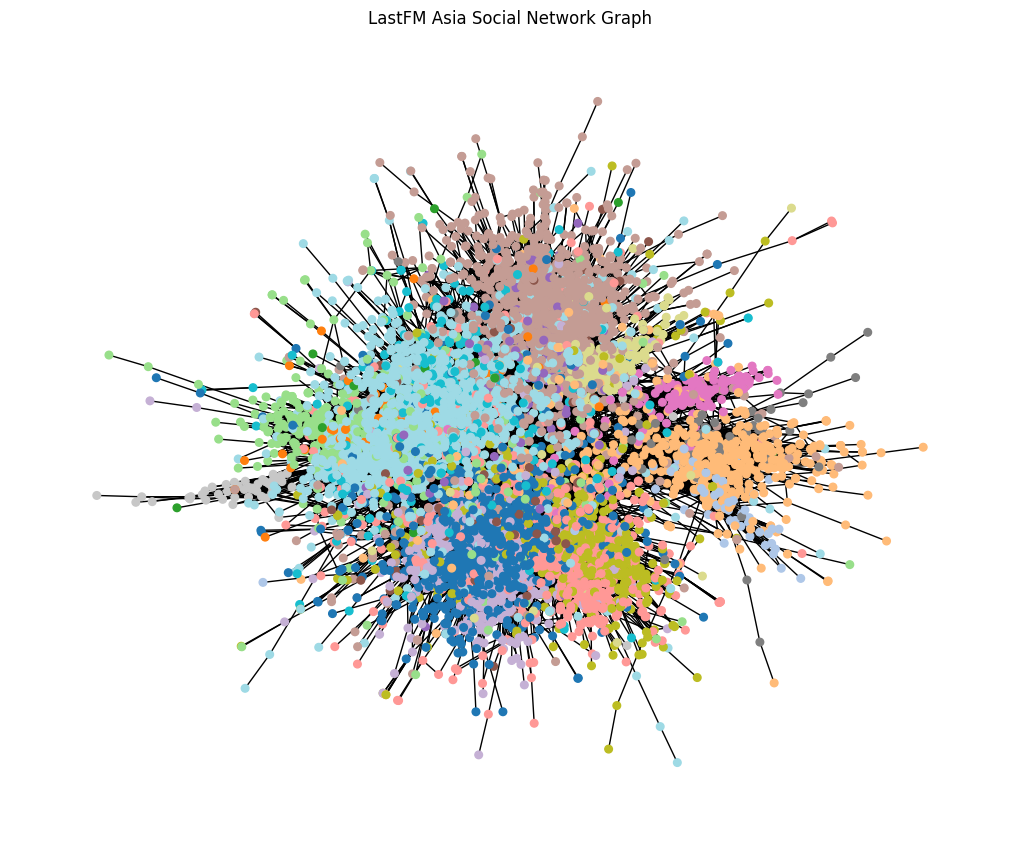

In [ ]:
# Plot the network graph
plt.figure(figsize=(10, 8))

# Get the list of countries for each node in the graph
countries = target_data.set_index('id')['target'].to_dict()

# Assign different colors to nodes based on their countries
node_colors = [countries[node] for node in G.nodes()]

# Draw the graph with nodes colored by country
nx.draw(G, with_labels=False, node_size=30, node_color=node_colors, cmap=plt.cm.tab20)

plt.title("LastFM Asia Social Network Graph")
plt.show()

### 3.5.2 Distribution of Users by Country

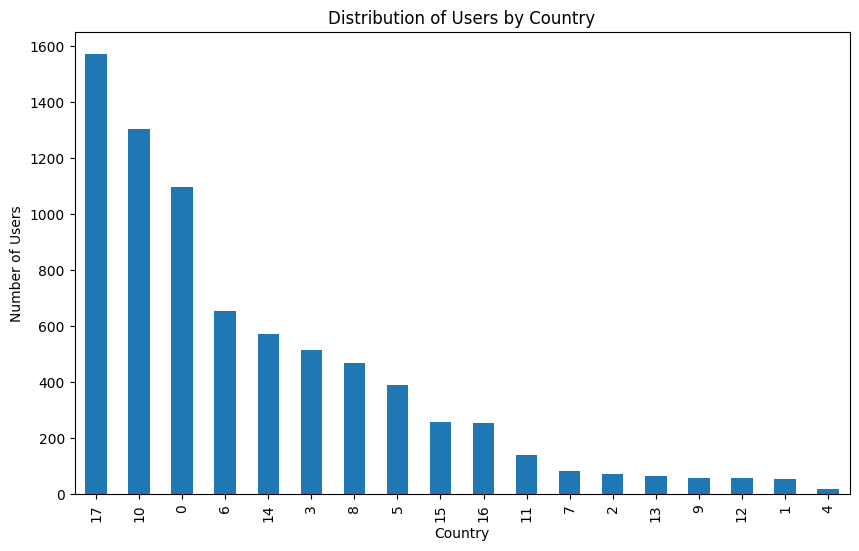

In [ ]:
# Create a bar plot to show the distribution of users by country
country_counts = target_data['target'].value_counts()
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.xlabel("Country")
plt.ylabel("Number of Users")
plt.title("Distribution of Users by Country")
plt.show()

# 4. Exploratory Data Analysis

## 4.1 Analysis of Mutual Follower Relationships

We'll use the DataFrame "artists_df" to calculate the mutual follower count.

In [ ]:
# Calculate the mutual follower count for each user
mutual_follower_count = pd.DataFrame(index=G.nodes(), columns=G.nodes(), data=0)

for u, v in G.edges():
    mutual_follower_count.loc[u, v] = len(list(nx.common_neighbors(G, u, v)))
    mutual_follower_count.loc[v, u] = len(list(nx.common_neighbors(G, v, u)))

# Display the mutual follower count DataFrame
print("Mutual Follower Count DataFrame:")
print(mutual_follower_count)

# Find the top artists with the highest number of mutual followers
max_mutual_followers = mutual_follower_count.max(axis=1)
top_artists = max_mutual_followers.sort_values(ascending=False).index[:10]

print("\nTop 10 artists with the highest number of mutual followers:")
print(top_artists)

Mutual Follower Count DataFrame:
      0     747   1     4257  2194  580   6478  1222  5735  7146  ...  7140  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
747      0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     1     0     0     0     0     0  ...     0   
4257     0     0     0     0     0     0     0     0     0     0  ...     0   
2194     0     0     1     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
7594     0     0     0     0     0     0     0     0     0     0  ...     0   
7276     0     0     0     0     0     0     0     0     0     0  ...     0   
7277     0     0     0     0     0     0     0     0     0     0  ...     0   
7420     0     0     0     0     0     0     0     0     0     0  ...     0   
7505     0     0     0     0     0     0     0     0     0     0  ...     0   

      7005  7196  

This code calculates the count of mutual artists between each pair of users. Since a user cannot be their own mutual follower, the diagonal values should be excluded from the analysis. The output provides valuable information about how users are connected based on their liked artists. Then we visualize its distribution.

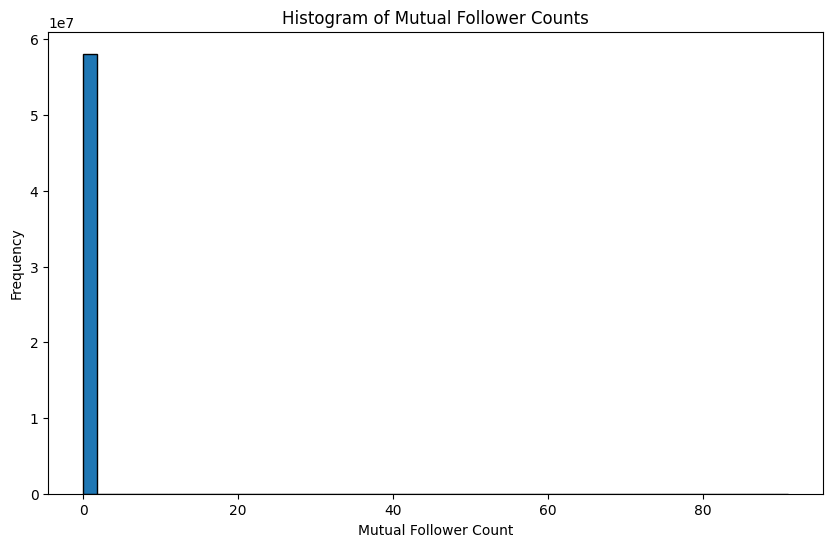

In [ ]:
# Flatten the mutual follower count DataFrame into a 1D array
mutual_follower_counts = mutual_follower_count.values.flatten()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(mutual_follower_counts, bins=50, edgecolor='black')
plt.xlabel('Mutual Follower Count')
plt.ylabel('Frequency')
plt.title('Histogram of Mutual Follower Counts')
plt.show()

In [ ]:
# Count the number of non-zero values in the mutual follower count DataFrame
num_non_zero = (mutual_follower_count > 0).sum().sum()
print(f"Number of non-zero values in the mutual follower count DataFrame: {num_non_zero}")

Number of non-zero values in the mutual follower count DataFrame: 40950


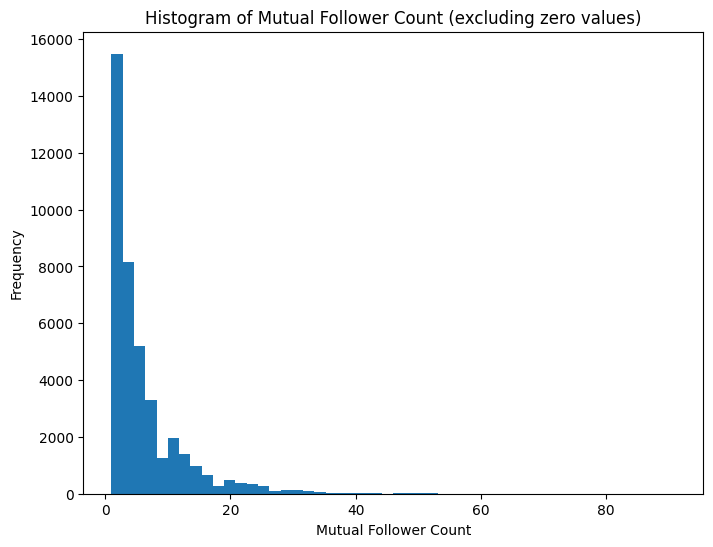

In [ ]:
# Plot histogram excluding zero values
plt.figure(figsize=(8, 6))
non_zero_values = mutual_follower_count[mutual_follower_count > 0].values.flatten()
plt.hist(non_zero_values, bins=50)
plt.xlabel("Mutual Follower Count")
plt.ylabel("Frequency")
plt.title("Histogram of Mutual Follower Count (excluding zero values)")
plt.show()

### 4.1.1 Network Characteristics

In [ ]:
# Calculate the number of nodes (artists) and edges (connections)
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Calculate the network density
density = nx.density(G)

# Calculate the average degree
avg_degree = sum(dict(G.degree()).values()) / num_nodes

# Clustering Coefficient
clustering_coefficient_dict = nx.clustering(G)
max_clustering_coefficient_node = max(clustering_coefficient_dict, key=clustering_coefficient_dict.get)

# Average Path Length
average_path_length = nx.average_shortest_path_length(G)

# Calculate transitivity
transitivity = nx.transitivity(G)

print(f"Number of artists: {num_nodes}")
print(f"Number of connections: {num_edges}")
print(f"Network density: {density:.4f}")
print(f"Transitivity: {transitivity:.4f}")
print(f"Average degree: {avg_degree:.4f}")
print(f"Node with the highest clustering coefficient: {max_clustering_coefficient_node}, Clustering Coefficient: {clustering_coefficient_dict[max_clustering_coefficient_node]:.4f}")
print(f"Average Path Length: {average_path_length:.4f}")

Number of artists: 7624
Number of connections: 27806
Network density: 0.0010
Transitivity: 0.1786
Average degree: 7.2943
Node with the highest clustering coefficient: 12, Clustering Coefficient: 1.0000
Average Path Length: 5.2322


- Number of artists: 7624 This represents the total number of artists (nodes) in the network. Each artist is considered a node in the social network.

- Number of connections: 27806 This represents the total number of mutual follower relationships (edges) between the artists. In other words, there are 27806 connections where two artists follow each other.

- Network density: 0.0010 Network density measures the proportion of actual connections to the total possible connections in the network. It indicates how interconnected the network is. A density of 0.0010 suggests that only a very small portion of possible connections is realized, indicating a sparse network.

- Transitivity: 0.1786 Transitivity measures the likelihood that if node A is connected to node B and node B is connected to node C, then node A is also connected to node C. It represents the clustering of connections in the network. A transitivity value of 0.1786 indicates that there is a moderate level of clustering, where artists who follow each other tend to have mutual connections.

- Average degree: 7.2943 Average degree is the average number of connections per artist (node) in the network. In this case, the average degree is approximately 7.29, which means on average, each artist follows around 7.29 other artists.

- Node with the highest clustering coefficient: Node 12, Clustering Coefficient: 1.0000 This indicates that there is a node (artist) in the network with a clustering coefficient of 1.0000, which means this artist's connections form a fully connected cluster. This node has the highest clustering among all artists.

- Average Path Length: 5.2322 Average path length represents the average number of steps required to traverse from one artist to another in the network. It is a measure of the overall efficiency of communication in the network. An average path length of 5.2322 suggests that, on average, it takes around 5.23 steps to reach one artist from another in the network.

Overall, the results indicate that the social network of LastFM artists from Asian countries is a relatively sparse network with moderate clustering and a relatively short average path length. There are artists who have formed tightly connected clusters, and on average, artists have around 7 connections. The network is not fully connected, and there is potential for further exploration and analysis of its structure and characteristics.

### 4.1.2 Degree Distribution and Centrality Measures

Degree distribution gives us insights into how many connections each artist has. It helps us understand the network's structure and how well-connected or isolated certain artists are.

Centrality measures provide information about the importance of individual artists in the network. Some common centrality measures are degree centrality, betweenness centrality, and closeness centrality.

Let's calculate degree distribution and centrality measures for our artist network

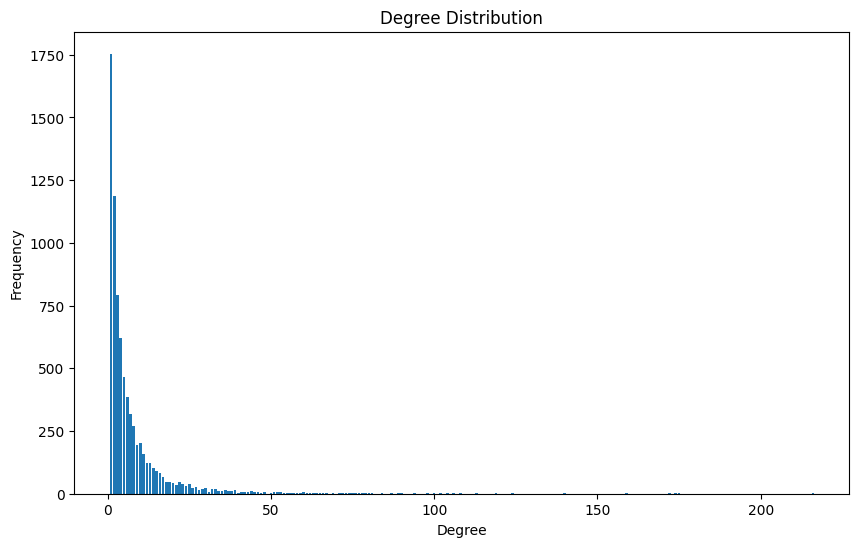

In [ ]:
# Calculate degree distribution
degree_dist = [degree for _, degree in G.degree()]
degree_counts = pd.Series(degree_dist).value_counts().sort_index()

# Plot degree distribution
plt.figure(figsize=(10, 6))
plt.bar(degree_counts.index, degree_counts.values)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

- The x-axis represents the degrees (number of connections) of the artists in the network.
- The y-axis represents the frequency of artists with a specific degree.
- The bar chart displays how many artists have a particular number of mutual followers (degree).

In this plot, we see that most artists have a low degree, meaning they have fewer mutual followers. However, there may be a few artists with a higher degree, indicating they have more mutual followers, and they might be considered "influential" in the network.

In [ ]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
pagerank = nx.pagerank(G)

# Convert centrality measures to DataFrames for easier analysis
degree_centrality_df = pd.DataFrame(degree_centrality.items(), columns=['Artist', 'Degree Centrality'])
betweenness_centrality_df = pd.DataFrame(betweenness_centrality.items(), columns=['Artist', 'Betweenness Centrality'])
closeness_centrality_df = pd.DataFrame(closeness_centrality.items(), columns=['Artist', 'Closeness Centrality'])
eigenvector_centrality_df = pd.DataFrame(eigenvector_centrality.items(), columns=['Artist', 'Eigenvector Centrality'])
pagerank_df = pd.DataFrame(pagerank.items(), columns=['Artist', 'PageRank'])

# Sort centrality DataFrames by descending values
degree_centrality_df = degree_centrality_df.sort_values(by='Degree Centrality', ascending=False)
betweenness_centrality_df = betweenness_centrality_df.sort_values(by='Betweenness Centrality', ascending=False)
closeness_centrality_df = closeness_centrality_df.sort_values(by='Closeness Centrality', ascending=False)
eigenvector_centrality_df = eigenvector_centrality_df.sort_values(by='Eigenvector Centrality', ascending=False)
pagerank_df = pagerank_df.sort_values(by='PageRank', ascending=False)

print("Top 10 artists by Degree Centrality:")
print(degree_centrality_df.head(10))

print("\nTop 10 artists by Betweenness Centrality:")
print(betweenness_centrality_df.head(10))

print("\nTop 10 artists by Closeness Centrality:")
print(closeness_centrality_df.head(10))

print("\nTop 10 artists by Eigenvector Centrality:")
print(eigenvector_centrality_df.head(10))

print("\nTop 10 artists by PageRank:")
print(pagerank_df.head(10))

Top 10 artists by Degree Centrality:
     Artist  Degree Centrality
170    7237           0.028335
128    3530           0.022957
669    4785           0.022826
99      524           0.022563
638    3450           0.020858
398    2510           0.018365
349    3597           0.016267
166    6101           0.015611
215    5127           0.015611
65     2854           0.015611
Top 10 artists by Betweenness Centrality:
      Artist  Betweenness Centrality
945     7199                0.089931
170     7237                0.085589
65      2854                0.077563
1145    4356                0.067250
166     6101                0.051805
43      5454                0.043614
690     4338                0.042899
215     5127                0.038412
638     3450                0.036933
669     4785                0.034961
Top 10 artists by Closeness Centrality:
      Artist  Closeness Centrality
945     7199              0.290710
170     7237              0.285677
1145    4356              0.

In [ ]:
# Calculate Hub and Authority scores using HITS algorithm
hub, authority = nx.hits(G)

# Convert Hub and Authority scores to DataFrames for easier analysis
hub_df = pd.DataFrame(hub.items(), columns=['Artist', 'Hub Score'])
authority_df = pd.DataFrame(authority.items(), columns=['Artist', 'Authority Score'])

# Sort Hub and Authority scores DataFrames by descending values
hub_df = hub_df.sort_values(by='Hub Score', ascending=False)
authority_df = authority_df.sort_values(by='Authority Score', ascending=False)

# Calculate Harmonic centrality
harmonic_centrality = nx.harmonic_centrality(G)

# Convert Harmonic centrality to a DataFrame for easier analysis
harmonic_centrality_df = pd.DataFrame(harmonic_centrality.items(), columns=['Artist', 'Harmonic Centrality'])

# Sort Harmonic centrality DataFrame by descending values
harmonic_centrality_df = harmonic_centrality_df.sort_values(by='Harmonic Centrality', ascending=False)

print("\nTop 10 artists by Hub Score:")
print(hub_df.head(10))

print("\nTop 10 artists by Authority Score:")
print(authority_df.head(10))

print("\nTop 10 artists by Harmonic Centrality:")
print(harmonic_centrality_df.head(10))


Top 10 artists by Hub Score:
      Artist  Hub Score
170     7237   0.017156
847     3240   0.013167
349     3597   0.012782
864      763   0.012169
564      378   0.011001
1269    2083   0.010899
171     1334   0.010887
225     3544   0.010173
853     4809   0.010133
1747    2734   0.009812
Top 10 artists by Authority Score:
      Artist  Authority Score
170     7237         0.017156
847     3240         0.013167
349     3597         0.012782
864      763         0.012169
564      378         0.011001
1269    2083         0.010899
171     1334         0.010887
225     3544         0.010173
853     4809         0.010133
1747    2734         0.009812
Top 10 artists by Harmonic Centrality:
      Artist  Harmonic Centrality
7237    7237          2455.860317
7199    7199          2409.889286
2854    2854          2360.824603
4356    4356          2325.426984
5454    5454          2324.828571
5127    5127          2322.667063
3450    3450          2318.075397
3544    3544          2301.2432

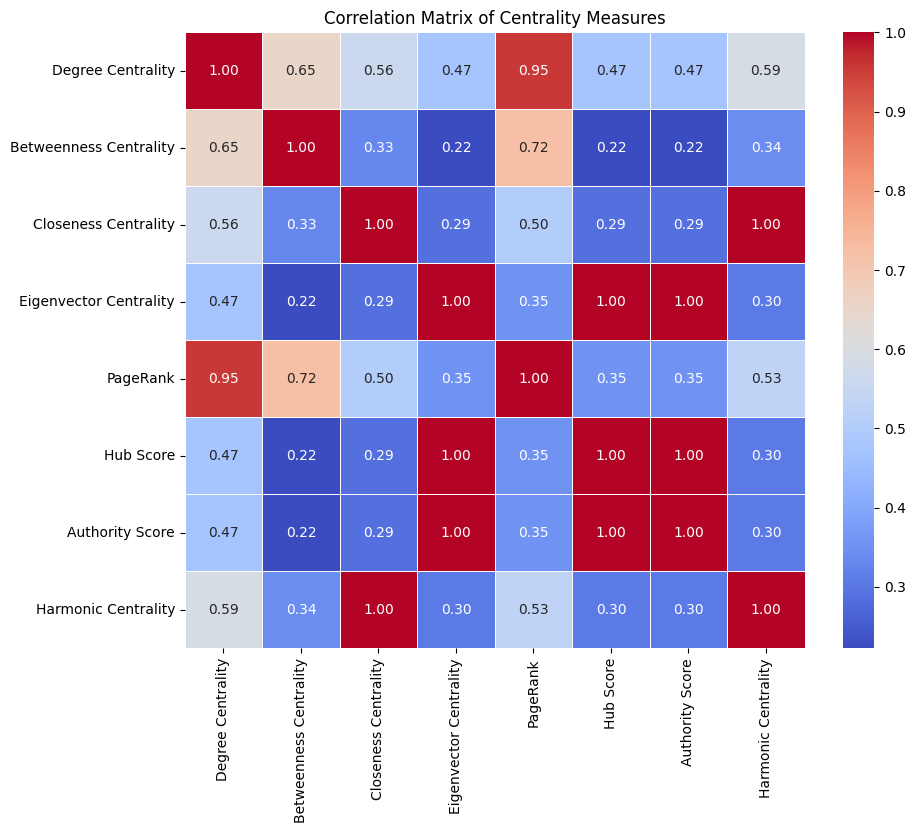

In [ ]:
# Combine all centrality measures into a single DataFrame
centrality_measures_df = pd.concat([
    degree_centrality_df.set_index('Artist'),
    betweenness_centrality_df.set_index('Artist'),
    closeness_centrality_df.set_index('Artist'),
    eigenvector_centrality_df.set_index('Artist'),
    pagerank_df.set_index('Artist'),
    hub_df.set_index('Artist'),
    authority_df.set_index('Artist'),
    harmonic_centrality_df.set_index('Artist')
], axis=1)

# Calculate the correlation matrix
correlation_matrix = centrality_measures_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Centrality Measures')
plt.show()

## 4.2 Analysis of Vertex Features (Artists Liked by Users)

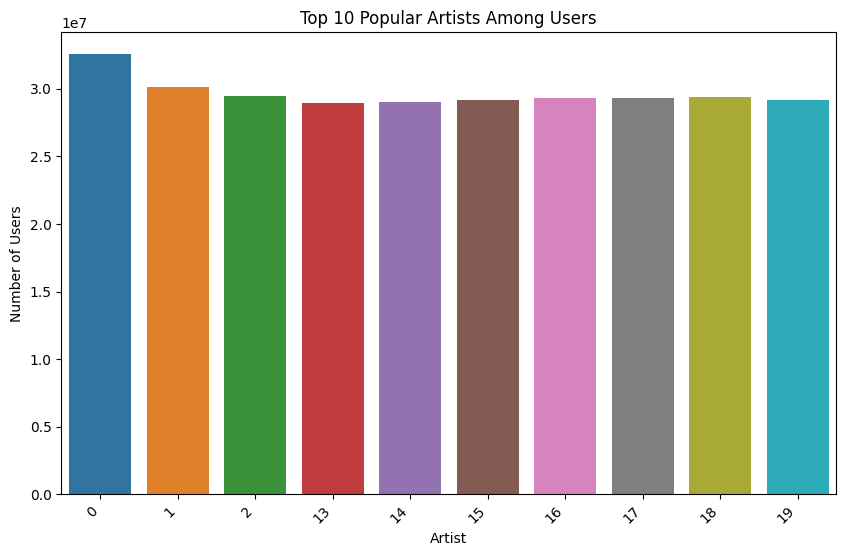

In [ ]:
# Count the number of users who liked each artist
artist_popularity = features_data.sum(axis=0).sort_values(ascending=False)

# Plot the top N popular artists among users
N = 10
plt.figure(figsize=(10, 6))
sns.barplot(x=artist_popularity.index[:N], y=artist_popularity.values[:N])
plt.xlabel('Artist')
plt.ylabel('Number of Users')
plt.title(f'Top {N} Popular Artists Among Users')
plt.xticks(rotation=45, ha='right')
plt.show()

### 4.2.1 Popular Artists among Users

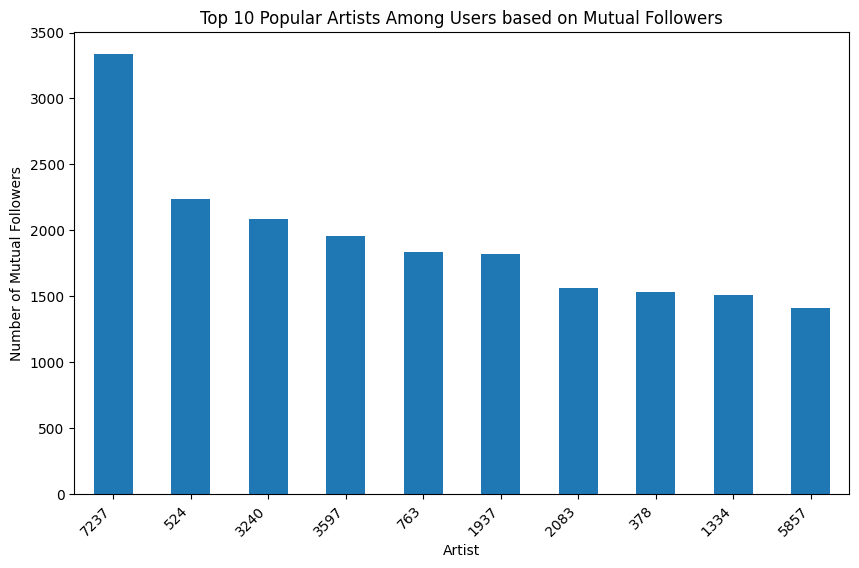

In [ ]:
# Calculate the number of mutual followers for each artist (node)
mutual_follower_counts = mutual_follower_count.sum(axis=1)

# Get the artists with the highest number of mutual followers
N = 10
top_mutual_followers_artists = mutual_follower_counts.sort_values(ascending=False).index[:N]

# Sort the mutual follower counts in descending order
sorted_mutual_follower_counts = mutual_follower_counts[top_mutual_followers_artists].sort_values(ascending=False)

# Plot the top N popular artists based on mutual followers
plt.figure(figsize=(10, 6))
sorted_mutual_follower_counts.plot(kind='bar')
plt.xlabel('Artist')
plt.ylabel('Number of Mutual Followers')
plt.title(f'Top {N} Popular Artists Among Users based on Mutual Followers')
plt.xticks(rotation=45, ha='right')
plt.show()

### 4.2.2 Country-wise Artist Preferences

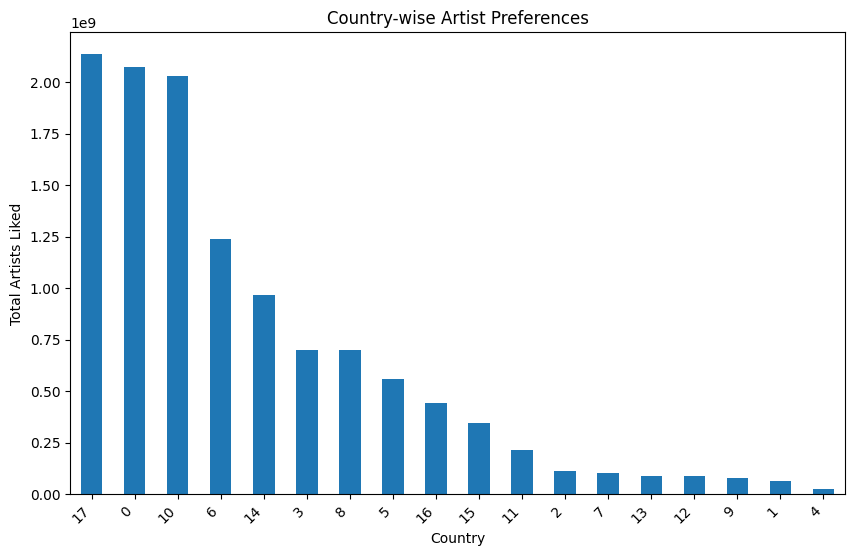

In [ ]:
# Convert the index of features_data to integer type
features_data.index = features_data.index.astype(int)

# Merge target_data with features_data to get country-wise artist preferences
country_artist_preferences = pd.concat([target_data, features_data], axis=1)

# Group by 'target' (country) and sum the artist preferences for each country
country_artist_preferences = country_artist_preferences.groupby('target').sum()

# Calculate the total number of artists liked by each country
country_artist_preferences['Total_Artists_Liked'] = country_artist_preferences.sum(axis=1)

# Sort the countries based on the total number of artists liked
country_artist_preferences = country_artist_preferences.sort_values(by='Total_Artists_Liked', ascending=False)

# Plot the country-wise artist preferences
plt.figure(figsize=(10, 6))
country_artist_preferences['Total_Artists_Liked'].plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Artists Liked')
plt.title('Country-wise Artist Preferences')
plt.xticks(rotation=45, ha='right')
plt.show()